<a href="https://colab.research.google.com/github/bathaee/QuGAN-EQ-GAN-report/blob/main/3_qubit_swap_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pennylane

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 75.7 MB/s eta 0:00:00


In [ ]:
import pennylane as qml
from pennylane import numpy as np
import tensorflow as tf

In [ ]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 13.5 MB/s eta 0:00:0

In [ ]:
#Noise model phase-flip qiskit
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error)

# Example error probabilities
p_gate1 = 0.1

# QuantumError objects
error_gate1 = pauli_error([('Z',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

# Add errors to noise model
noise_phase_flip = NoiseModel()
noise_phase_flip.add_all_qubit_quantum_error(error_gate1, ["h", "rx", "ry","rz"])
noise_phase_flip.add_all_qubit_quantum_error(error_gate2, ["cz"])

print(noise_phase_flip)


NoiseModel:
  Basis gates: ['cx', 'cz', 'h', 'id', 'rx', 'ry', 'rz', 'sx']
  Instructions with noise: ['cz', 'h', 'ry', 'rz', 'rx']
  All-qubits errors: ['h', 'rx', 'ry', 'rz', 'cz']


In [ ]:
!pip install pennylane-qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.3/177.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.6/253.6 kB 24.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 kB 6.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ibm-platform-services: filename=ibm_platform_serv

In [ ]:
dev_n = qml.device(
        "qiskit.aer",
        wires=6,
        shots=1000,
        noise_model=noise_phase_flip,
        backend="aer_simulator_statevector",
        seed_simulator=1,
        seed_transpiler=1,
    )

In [ ]:
#3qubit-GHZ: Real DATA
def GHZ():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[1,2])


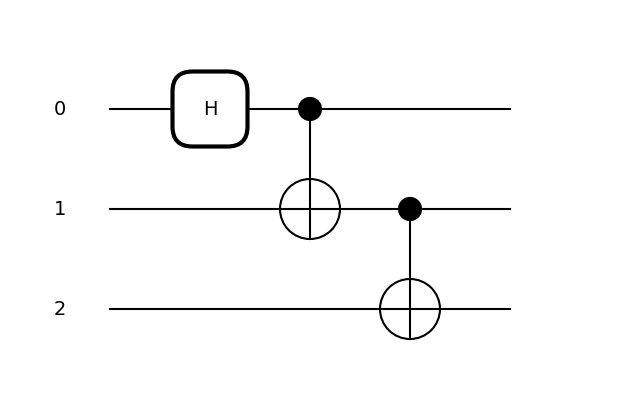

In [ ]:
import matplotlib.pyplot as plt
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(GHZ)()
plt.show()

In [ ]:
def generator(w,**kwargs):
    qml.RZ(w[0], wires=3)
    qml.RX(w[1], wires=3)
    qml.RZ(w[2], wires=3)
    qml.RZ(w[3], wires=4)
    qml.RX(w[4], wires=4)
    qml.RZ(w[5], wires=4)
    qml.RZ(w[6], wires=5)
    qml.RX(w[7], wires=5)
    qml.RZ(w[8], wires=5)
    qml.CZ(wires=[3,4])
    qml.CZ(wires=[4,5])
    qml.CZ(wires=[5,3])
    qml.RZ(w[9], wires=3)
    qml.RX(w[10], wires=3)
    qml.RZ(w[11], wires=3)
    qml.RZ(w[12], wires=4)
    qml.RX(w[13], wires=4)
    qml.RZ(w[14], wires=4)
    qml.RZ(w[15], wires=5)
    qml.RX(w[16], wires=5)
    qml.RZ(w[17], wires=5)

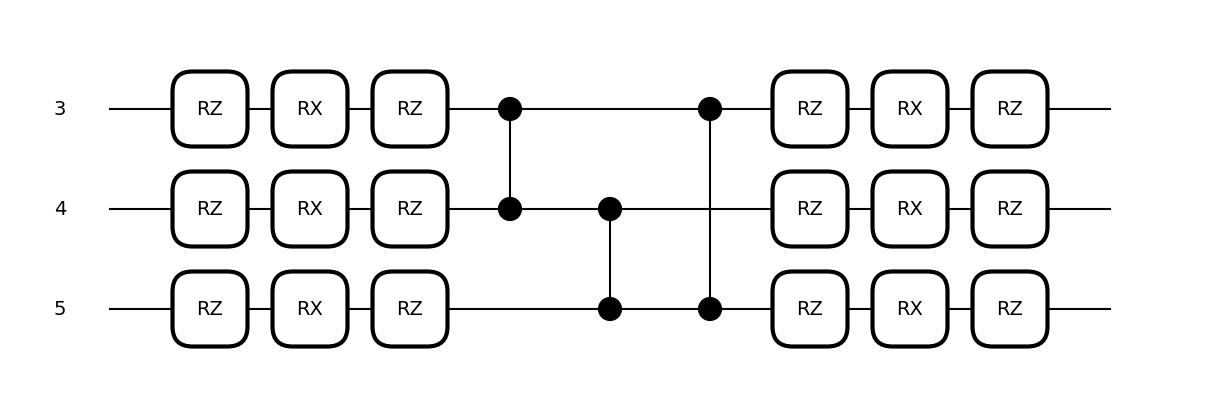

In [ ]:
import matplotlib.pyplot as plt
w = np.array([0]*18)
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(generator)(w)
plt.show()

In [ ]:
def discriminator(w,**kwargs):
    qml.Hadamard(wires=0)
    qml.CZ(wires=[3, 0])
    qml.RZ(w[0], wires=0)
    qml.RZ(w[1], wires=3)
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=3)
    qml.Hadamard(wires=1)
    qml.CZ(wires=[4, 1])
    qml.RZ(w[2], wires=1)
    qml.RZ(w[3], wires=4)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=4)
    qml.Hadamard(wires=2)
    qml.CZ(wires=[5, 2])
    qml.RZ(w[4], wires=2)
    qml.RZ(w[5], wires=5)
    qml.Hadamard(wires=2)
    qml.Hadamard(wires=5)

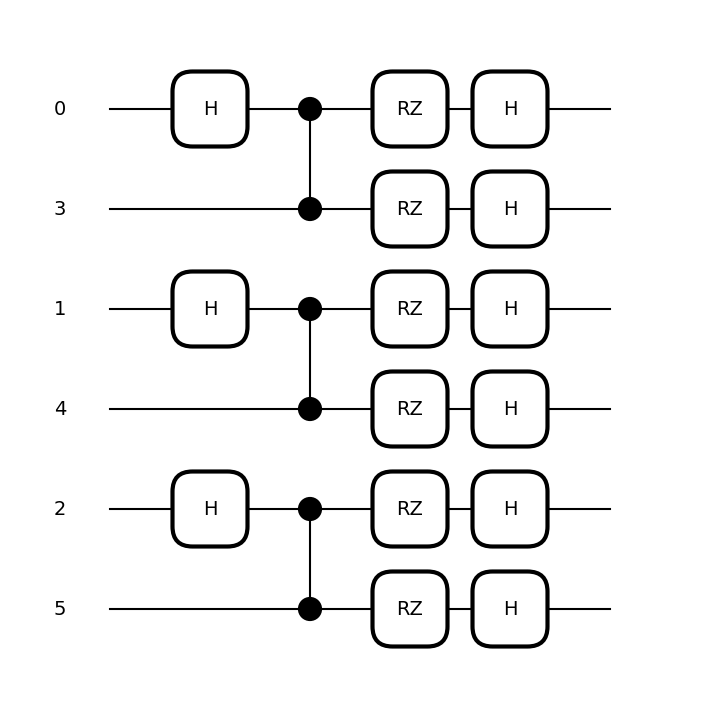

In [ ]:
import matplotlib.pyplot as plt
w = np.array([0]*6)
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(discriminator)(w)
plt.show()

In [ ]:
op1 = (qml.Identity(0)-qml.PauliZ(0))@ (qml.Identity(1)+qml.PauliZ(1))@ \
      (qml.Identity(2)+qml.PauliZ(2)@ (qml.Identity(3)-qml.PauliZ(3)))@ \
      (qml.Identity(4)+qml.PauliZ(4))@ (qml.Identity(5)+qml.PauliZ(5))

op2 = (qml.Identity(0)-qml.PauliZ(0))@ (qml.Identity(1)+qml.PauliZ(1))@ \
      (qml.Identity(2)+qml.PauliZ(2)@ (qml.Identity(3)-qml.PauliZ(3)))@ \
      (qml.Identity(4)-qml.PauliZ(4))@ (qml.Identity(5)+qml.PauliZ(5))

op3 = (qml.Identity(0)-qml.PauliZ(0))@ (qml.Identity(1)-qml.PauliZ(1))@ \
      (qml.Identity(2)+qml.PauliZ(2)@ (qml.Identity(3)-qml.PauliZ(3)))@ \
      (qml.Identity(4)+qml.PauliZ(4))@ (qml.Identity(5)+qml.PauliZ(5))

op4 = (qml.Identity(0)+qml.PauliZ(0))@ (qml.Identity(1)-qml.PauliZ(1))@ \
      (qml.Identity(2)+qml.PauliZ(2)@ (qml.Identity(3)+qml.PauliZ(3)))@ \
      (qml.Identity(4)-qml.PauliZ(4))@ (qml.Identity(5)+qml.PauliZ(5))

op5 = (qml.Identity(0)-qml.PauliZ(0))@ (qml.Identity(1)-qml.PauliZ(1))@ \
      (qml.Identity(2)+qml.PauliZ(2)@ (qml.Identity(3)+qml.PauliZ(3)))@ \
      (qml.Identity(4)-qml.PauliZ(4))@ (qml.Identity(5)-qml.PauliZ(5))

op6 = (qml.Identity(0)+qml.PauliZ(0))@ (qml.Identity(1)-qml.PauliZ(1))@ \
      (qml.Identity(2)-qml.PauliZ(2)@ (qml.Identity(3)-qml.PauliZ(3)))@ \
      (qml.Identity(4)-qml.PauliZ(4))@ (qml.Identity(5)+qml.PauliZ(5))

op7 = (qml.Identity(0)+qml.PauliZ(0))@ (qml.Identity(1)+qml.PauliZ(1))@ \
      (qml.Identity(2)-qml.PauliZ(2)@ (qml.Identity(3)+qml.PauliZ(3)))@ \
      (qml.Identity(4)+qml.PauliZ(4))@ (qml.Identity(5)-qml.PauliZ(5))

op8 = (qml.Identity(0)-qml.PauliZ(0))@ (qml.Identity(1)+qml.PauliZ(1))@ \
      (qml.Identity(2)-qml.PauliZ(2)@ (qml.Identity(3)+qml.PauliZ(3)))@ \
      (qml.Identity(4)-qml.PauliZ(4))@ (qml.Identity(5)-qml.PauliZ(5))

op9 = (qml.Identity(0)+qml.PauliZ(0))@ (qml.Identity(1)-qml.PauliZ(1))@ \
      (qml.Identity(2)-qml.PauliZ(2)@ (qml.Identity(3)-qml.PauliZ(3)))@ \
      (qml.Identity(4)+qml.PauliZ(4))@ (qml.Identity(5)-qml.PauliZ(5))

op10 = (qml.Identity(0)-qml.PauliZ(0))@ (qml.Identity(1)-qml.PauliZ(1))@ \
      (qml.Identity(2)-qml.PauliZ(2)@ (qml.Identity(3)-qml.PauliZ(3)))@ \
      (qml.Identity(4)-qml.PauliZ(4))@ (qml.Identity(5)-qml.PauliZ(5))

a = qml.expval(op1),qml.expval(op2),qml.expval(op3),qml.expval(op4),qml.expval(op5),\
        qml.expval(op6),qml.expval(op7),qml.expval(op8),qml.expval(op9),qml.expval(op10)

@qml.qnode(dev_n, interface='tf')
def real_gen_disc_circuit1(gen_weights, disc_weights):
    GHZ()
    generator(gen_weights)
    discriminator(disc_weights)
    return qml.expval(op1)

@qml.qnode(dev_n, interface='tf')
def real_gen_disc_circuit2(gen_weights, disc_weights):
    GHZ()
    generator(gen_weights)
    discriminator(disc_weights)
    return qml.expval(op2)

@qml.qnode(dev_n, interface='tf')
def real_gen_disc_circuit3(gen_weights, disc_weights):
    GHZ()
    generator(gen_weights)
    discriminator(disc_weights)
    return qml.expval(op3)

@qml.qnode(dev_n, interface='tf')
def real_gen_disc_circuit4(gen_weights, disc_weights):
    GHZ()
    generator(gen_weights)
    discriminator(disc_weights)
    return qml.expval(op4)

@qml.qnode(dev_n, interface='tf')
def real_gen_disc_circuit5(gen_weights, disc_weights):
    GHZ()
    generator(gen_weights)
    discriminator(disc_weights)
    return qml.expval(op5)

@qml.qnode(dev_n, interface='tf')
def real_gen_disc_circuit6(gen_weights, disc_weights):
    GHZ()
    generator(gen_weights)
    discriminator(disc_weights)
    return qml.expval(op6)

@qml.qnode(dev_n, interface='tf')
def real_gen_disc_circuit7(gen_weights, disc_weights):
    GHZ()
    generator(gen_weights)
    discriminator(disc_weights)
    return qml.expval(op7)

@qml.qnode(dev_n, interface='tf')
def real_gen_disc_circuit8(gen_weights, disc_weights):
    GHZ()
    generator(gen_weights)
    discriminator(disc_weights)
    return qml.expval(op8)

@qml.qnode(dev_n, interface='tf')
def real_gen_disc_circuit9(gen_weights, disc_weights):
    GHZ()
    generator(gen_weights)
    discriminator(disc_weights)
    return qml.expval(op9)

@qml.qnode(dev_n, interface='tf')
def real_gen_disc_circuit10(gen_weights, disc_weights):
    GHZ()
    generator(gen_weights)
    discriminator(disc_weights)
    return qml.expval(op10)

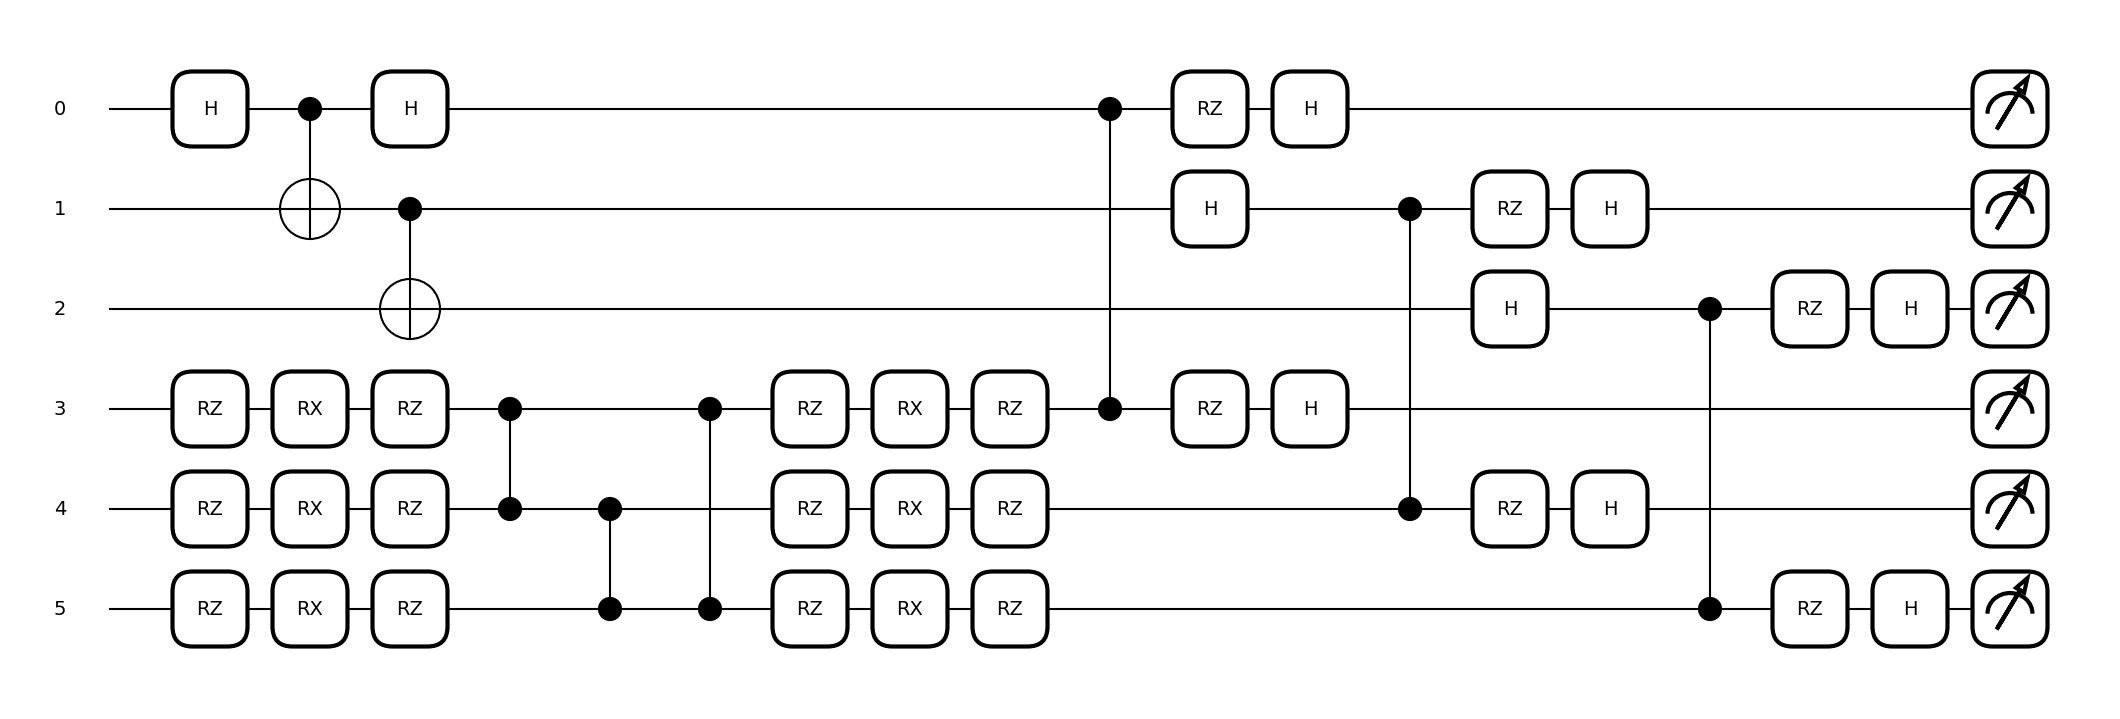

In [ ]:
import matplotlib.pyplot as plt
w1 = np.array([0]*18)
w2 = np.array([0]*6)
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(real_gen_disc_circuit1)(w1,w2)
plt.show()

In [ ]:
def prob_discriminated(gen_weights,disc_weights):
    discriminated_output1 = real_gen_disc_circuit1(gen_weights, disc_weights)
    discriminated_output2 = real_gen_disc_circuit2(gen_weights, disc_weights)
    discriminated_output3 = real_gen_disc_circuit3(gen_weights, disc_weights)
    discriminated_output4 = real_gen_disc_circuit1(gen_weights, disc_weights)
    discriminated_output5 = real_gen_disc_circuit2(gen_weights, disc_weights)
    discriminated_output6 = real_gen_disc_circuit3(gen_weights, disc_weights)
    discriminated_output7 = real_gen_disc_circuit1(gen_weights, disc_weights)
    discriminated_output8 = real_gen_disc_circuit2(gen_weights, disc_weights)
    discriminated_output9 = real_gen_disc_circuit3(gen_weights, disc_weights)
    discriminated_output10 = real_gen_disc_circuit1(gen_weights, disc_weights)
    #convert to probability
    prob_discriminated_output =(discriminated_output1+discriminated_output2+discriminated_output3+\
                               discriminated_output4+discriminated_output5+discriminated_output6+\
                               discriminated_output7+discriminated_output8+discriminated_output9+\
                               discriminated_output10)/(64)
    return prob_discriminated_output

In [ ]:
def disc_cost(disc_weights):
    cost = 1-prob_discriminated(gen_weights,disc_weights)
    return cost
def gen_cost(gen_weights):
    cost = prob_discriminated(gen_weights,disc_weights)
    return cost

In [ ]:
@qml.qnode(dev_n, interface="tf")
def circuit_gs(angles):
    generator(angles)
    return qml.density_matrix([3,4,5])

dev1 = qml.device('default.mixed', wires=6)
@qml.qnode(dev_n, interface="tf")
def circuit_rs():
    GHZ()
    return qml.density_matrix([0,1,2])

In [ ]:
#Perfect Swap Test
np.random.seed(0)
eps = 1e-2
#init_gen_weights = np.array([np.pi] + [0] * 8) + \
                   #np.random.normal(scale=eps, size=(9,))

init_gen_weights = np.array([0]*18)
#init_disc_weights = np.random.normal(size=(2,))
init_disc_weights = np.array([0]*6)
gen_weights = tf.Variable(init_gen_weights,dtype=tf.float64)
disc_weights = tf.Variable(init_disc_weights,dtype=tf.float64)


In [ ]:
#Perfect Swap Test
np.random.seed(0)
eps = 1e-2
#init_gen_weights = np.array([np.pi] + [0] * 8) + \
                   #np.random.normal(scale=eps, size=(9,))

init_gen_weights = np.array([0]*18)
#init_disc_weights = np.random.normal(size=(2,))
init_disc_weights = np.array([0]*6)
gen_weights = tf.Variable(init_gen_weights,dtype=tf.float64)
disc_weights = tf.Variable(init_disc_weights,dtype=tf.float64)



###############
loss_val_d = []
loss_val_g = []
step_gf = []
sg_f =[]

###############
epochs = 2
a = 1
for i in range(epochs):
    #opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.01)
    opt = tf.keras.optimizers.legacy.SGD(learning_rate=0.4)
    var_g = gen_weights
    loss = lambda: gen_cost(gen_weights)         # d(loss)/d(var1) = var1

    for step in range(a):
        opt.minimize(loss, [var_g])
        if step % 5 == 0:
            loss_val = loss().numpy()
            loss_val_g.append(loss_val)
            step1 = step+i*(a)
            step_gf.append(step1)
            print("Step {}: cost = {}".format(step1, loss_val))
            state_fidelity = qml.math.fidelity(circuit_rs(), circuit_gs(var_g))
            sg_f.append(state_fidelity)

perfect_swap = sg_f
perfect_step_g = step_gf

Step 0: cost = 0.030750000000000003


/usr/local/lib/python3.10/dist-packages/pennylane/_qubit_device.py:981: UserWarning: Requested state or density matrix with finite shots; the returned state information is analytic and is unaffected by sampling. To silence this warning, set shots=None on the device.
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(range(len(perfect_step_g)), perfect_swap, label="perfect swap")
#plt.plot(range(len(step_d)), loss_val_d, label="Discriminator loss-min")
plt.title("fidelity")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [ ]:
#  frozen discriminator + alternative training
#####
np.random.seed(0)
eps = 1e-2
init_gen_weights = np.array([np.pi] + [0] * 2) + \
                   np.random.normal(scale=eps, size=(3,))
#init_gen_weights = np.array([0]*3)
#init_disc_weights = np.random.normal(size=(2,))
init_disc_weights = np.array([0]*2)
gen_weights = tf.Variable(init_gen_weights,dtype=tf.float64)
disc_weights = tf.Variable(init_disc_weights,dtype=tf.float64)
#####

loss_val_d = []
loss_val_g = []
step_d = []
step_g = []
sg =[]

##
#fozen discriminator
epochs1 = 150
a1 = 1
for i in range(epochs1):
    opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.01)
    var_g = gen_weights
    loss = lambda: gen_cost(gen_weights)         # d(loss)/d(var1) = var1

    for step in range(a1):
        opt.minimize(loss, [var_g])
        if step % 5 == 0:
            loss_val = loss().numpy()
            loss_val_g.append(loss_val)
            step1 = step+i*(a1)
            step_g.append(step1)
            print("Step {}: cost = {}".format(step1, loss_val))
            #red_r = qml.math.reduced_dm(circuit_rs(),indices=[1])
            #red_g = qml.math.reduced_dm(circuit_gs(var_g),indices=[0])
            #state_fidelity = qml.math.fidelity(red_r, red_g)
            state_fidelity = qml.math.fidelity(circuit_rs(), circuit_gs(var_g))
            sg.append(state_fidelity)

#alternative training
epochs2 = 25
a2 = 1
a3 = 1
for i in range(epochs2):
    opt = tf.keras.optimizers.experimental.Adam(learning_rate=0.01)
    var = disc_weights
    loss = lambda: disc_cost(disc_weights)         # d(loss)/d(var1) = var1

    for step in range(a2):
        opt.minimize(loss, [var])
        if step % 5 == 0:
            loss_val = loss().numpy()
            loss_val_d.append(loss_val)
            step2 = step+a1*epochs1+a2*i+a3*i
            step_d.append(step2)
            print("Step {}: cost = {}".format(step2, loss_val))
            #red_r = qml.math.reduced_dm(circuit_rs(),indices=[1])
            #red_g = qml.math.reduced_dm(circuit_gs(var_g),indices=[0])
            #state_fidelity = qml.math.fidelity(red_r, red_g)
            state_fidelity = qml.math.fidelity(circuit_rs(), circuit_gs(var_g))
            sg.append(state_fidelity)

    opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.01)
    var_g = gen_weights
    loss = lambda: gen_cost(gen_weights)         # d(loss)/d(var1) = var1

    for step in range(a3):
        opt.minimize(loss, [var_g])
        if step % 5 == 0:
            loss_val = loss().numpy()
            loss_val_g.append(loss_val)
            step3 = step+a1*epochs1+a2*(i+1)+a3*(i)
            step_g.append(step3)
            print("Step {}: cost = {}".format(step3, loss_val))
            #red_r = qml.math.reduced_dm(circuit_rs(),indices=[1])
            #red_g = qml.math.reduced_dm(circuit_gs(var_g),indices=[0])
            #state_fidelity = qml.math.fidelity(red_r, red_g)
            state_fidelity = qml.math.fidelity(circuit_rs(), circuit_gs(var_g))
            sg.append(state_fidelity)


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(range(len(step_g+step_d)), sg, label="EQ-GAN")
plt.plot(range(len(perfect_step_g)), perfect_swap, label="perfect swap")
#plt.plot(range(len(step_d)), loss_val_d, label="Discriminator loss-min")
plt.title("fidelity")
plt.xlabel("Epoch")
plt.legend()
plt.show()